In [83]:
x=[20,24,28,22,32,28,32,36,41,41] #amount of maize
y=[16,18,23,24,28,29,26,31,32,34] #Agricultural yield

In [84]:
import statistics as s
x1=s.mean(x)
x1

30.4

In [85]:
y1=s.mean(y)
y1

26.1

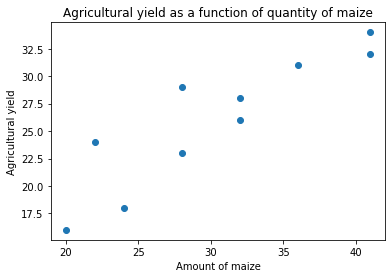

In [86]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

plt.title('Agricultural yield as a function of quantity of maize')
plt.xlabel('Amount of maize')
plt.ylabel('Agricultural yield')
plt.show()

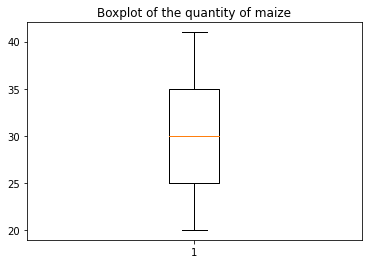

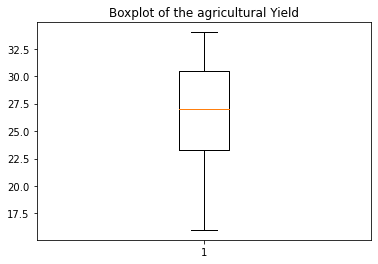

In [87]:
#Boxplot of x
plt.title('Boxplot of the quantity of maize')
plt.boxplot(x)
plt.show()

#Boxplot of x
plt.title('Boxplot of the agricultural Yield')
plt.boxplot(y)
plt.show()

#According to the symmetry of boxplots, we have normal distributions.

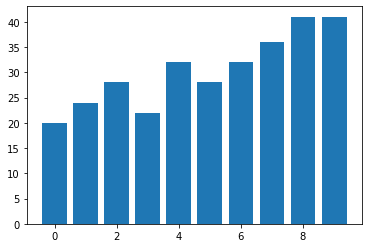

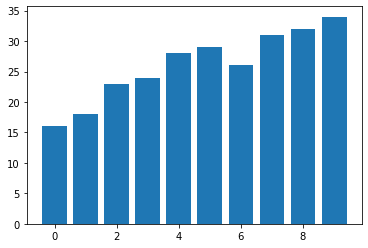

In [80]:
l=[]
for i in range(0,len(x)):
    l.append(i)

#bar plot x
plt.bar(l,x)
plt.show()

#bar plot y
plt.bar(l,y)
plt.show()

In [13]:
#The Jarque-Bera test is a hypothesis test that seeks to determine whether data follow a normal distribution.

In [88]:
#jarque_bera test
from scipy import stats 
jarque_bera_test_x = stats.jarque_bera(x)
jarque_bera_test_x

# Since this p-value is not less than 5%, we fail to reject the null hypothesis.

Jarque_beraResult(statistic=0.6020084231998077, pvalue=0.7400746558417948)

In [89]:
jarque_bera_test_y = stats.jarque_bera(y)
jarque_bera_test_y

# Since this p-value is not less than 5%, we fail to reject the null hypothesis.

Jarque_beraResult(statistic=0.6584931360176942, pvalue=0.7194655976751878)

In [ ]:
#A normal distribution has an asymmetry coefficient of 0 and a kurtosis of 3. We then enter that if the data follow a normal distribution, the test then approaches 0 and we accept (do not reject) H0 at threshold α .
#The Jarque-Bera test does not strictly speaking test if the data follow a normal distribution, but rather if the kurtosis and the skewness coefficient of the data are the same as those of a normal distribution with the same expectation and variance.

In [91]:
#kurtosis
stats.kurtosis(x)

#We notice that the kurtosis of x is different from 3 so we reject the normality hypothesis.

-1.1577214934263187

In [93]:
stats.kurtosis(y)

#We notice that the kurtosis of y is different from 3 so we reject the normality hypothesis.

-0.9236507005051631

In [101]:
import pandas as pd
import numpy  as np

X = np.array([20,24,28,22,32,28,32,36,41,41])  
y = np.array([16,18,23,24,28,29,26,31,32,34])             

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

df

,X,y
0,20,16
1,24,18
2,28,23
3,22,24
4,32,28
5,28,29
6,32,26
7,36,31
8,41,32
9,41,34


In [103]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

df

alpha = 4.3927701056052015
beta = 0.7140536149471974


,X,y,xycov,xvar
0,20,16,105.04,108.16
1,24,18,51.84,40.96
2,28,23,7.44,5.76
3,22,24,17.64,70.56
4,32,28,3.04,2.56
5,28,29,-6.96,5.76
6,32,26,-0.16,2.56
7,36,31,27.44,31.36
8,41,32,62.54,112.36
9,41,34,83.74,112.36


In [106]:
#y predicted
y_pred = alpha + beta * X
y_pred

array([18.6738424 , 21.53005686, 24.38627132, 20.10194963, 27.24248578,
       24.38627132, 27.24248578, 30.09870024, 33.66896832, 33.66896832])

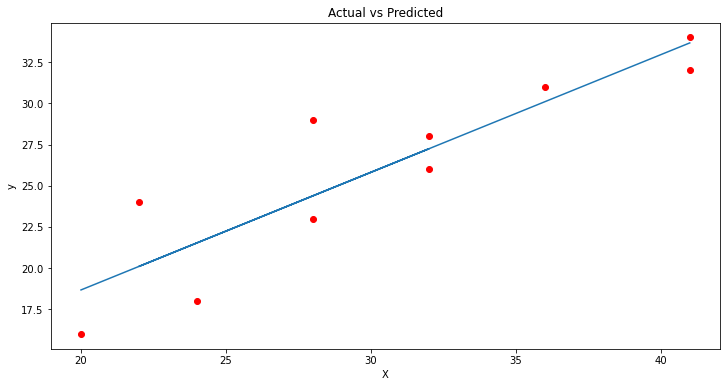

In [109]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, y_pred)   # regression line
plt.plot(X, y, 'ro')  # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()